# Exploratory Data Analysis Starter

## Import packages

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---

## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the `read_csv` method accordingly.

In [4]:
ls

 Volume in drive E has no label.
 Volume Serial Number is F0B5-2A03

 Directory of E:\great learning\power co

04/02/2025  07:28 PM    <DIR>          .
04/02/2025  07:22 PM    <DIR>          ..
04/02/2025  07:24 PM    <DIR>          .ipynb_checkpoints
04/02/2025  07:22 PM         3,487,664 client_data (1).csv
04/02/2025  07:22 PM        18,316,245 price_data (1).csv
04/02/2025  07:28 PM            71,780 Task 2 - eda_starter.ipynb
               3 File(s)     21,875,689 bytes
               3 Dir(s)  369,312,014,336 bytes free


In [2]:
client_df = pd.read_csv('client_data (1).csv')
price_df = pd.read_csv('price_data (1).csv')

You can view the first 3 rows of a dataframe using the `head` method. Similarly, if you wanted to see the last 3, you can use `tail(3)`

In [7]:
client_df.head(3)

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   

   cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
0         0         54946                0  2013-06-15  2016-06-15   
1      4660             0                0  2009-08-21  2016-08-30   
2       544             0                0  2010-04-16  2016-04-16   

  date_modif_prod date_renewal  forecast_cons_12m  ...  has_gas  imp_cons  \
0      2015-11-01   2015-06-23               0.00  ...        t       0.0   
1      2009-08-21   2015-08-31             189.95  ...        f       0.0   
2      2010-04-16   2015-04-17              47.96  ...        f       0.0   

   margin_gross_pow_ele  margin_net_pow_ele  nb_prod_act  net_margin  \
0                 25.44               25.44            2      678.99   
1                 16.38               16.38            1       18.89   
2                 28.60               28.60            1        6.60   

  num_years_antig                         origin_up  pow_max  churn  
0               3  lxidpiddsbxsbosboudacockeimpuepw   43.648      1  
1               6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800      0  
2               6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856      0  

[3 rows x 26 columns]

In [8]:
price_df.head(3)

id  price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745  2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745  2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745  2015-03-01            0.151367   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0

---

## Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

In [10]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [11]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [13]:
client_df.describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  1.460600e+04  1.460600e+04     14606.000000       14606.000000   
mean   1.592203e+05  2.809238e+04     16090.269752        1868.614880   
std    5.734653e+05  1.629731e+05     64364.196422        2387.571531   
min    0.000000e+00  0.000000e+00         0.000000           0.000000   
25%    5.674750e+03  0.000000e+00         0.000000         494.995000   
50%    1.411550e+04  0.000000e+00       792.500000        1112.875000   
75%    4.076375e+04  0.000000e+00      3383.000000        2401.790000   
max    6.207104e+06  4.154590e+06    771203.000000       82902.830000   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14606.000000              14606.000000             14606.000000   
mean          1399.762906                  0.966726                63.086871   
std           3247.786255                  5.108289                66.165783   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                16.180000   
50%            314.000000                  0.000000                18.795000   
75%           1745.750000                  0.000000               131.030000   
max         175375.000000                 30.000000               599.310000   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    14606.000000                14606.000000   
mean                         0.137283                    0.050491   
std                          0.024623                    0.049037   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak      imp_cons  margin_gross_pow_ele  \
count                 14606.000000  14606.000000          14606.000000   
mean                     43.130056    152.786896             24.565121   
std                       4.485988    341.369366             20.231172   
min                       0.000000      0.000000              0.000000   
25%                      40.606701      0.000000             14.280000   
50%                      44.311378     37.395000             21.640000   
75%                      44.311378    193.980000             29.880000   
max                      59.266378  15042.790000            374.640000   

       margin_net_pow_ele   nb_prod_act    net_margin  num_years_antig  \
count        14606.000000  14606.000000  14606.000000     14606.000000   
mean            24.562517      1.292346    189.264522         4.997809   
std             20.230280      0.709774    311.798130         1.611749   
min              0.000000      1.000000      0.000000         1.000000   
25%             14.280000      1.000000     50.712500         4.000000   
50%             21.640000      1.000000    112.530000         5.000000   
75%             29.880000      1.000000    243.097500         6.000000   
max            374.640000     32.000000  24570.650000        13.000000   

            pow_max         churn  
count  14606.000000  14606.000000  
mean      18.135136      0.097152  
std       13.534743      0.296175  
min        3.300000      0.000000  
25%       12.500000      0.000000  
50%       13.856000      0.000000  
75%       19.172500      0.000000  
max      320.000000      1.000000

In [14]:
price_df.describe()

price_off_peak_var  price_peak_var  price_mid_peak_var  \
count       193002.000000   193002.000000       193002.000000   
mean             0.141027        0.054630            0.030496   
std              0.025032        0.049924            0.036298   
min              0.000000        0.000000            0.000000   
25%              0.125976        0.000000            0.000000   
50%              0.146033        0.085483            0.000000   
75%              0.151635        0.101673            0.072558   
max              0.280700        0.229788            0.114102   

       price_off_peak_fix  price_peak_fix  price_mid_peak_fix  
count       193002.000000   193002.000000       193002.000000  
mean            43.334477       10.622875            6.409984  
std              5.410297       12.841895            7.773592  
min              0.000000        0.000000            0.000000  
25%             40.728885        0.000000            0.000000  
50%             44.266930        0.000000            0.000000  
75%             44.444710       24.339581           16.226389  
max             59.444710       36.490692           17.458221

---

## Data visualization

If you're working in Python, two of the most popular packages for visualization are `matplotlib` and `seaborn`. We highly recommend you use these, or at least be familiar with them because they are ubiquitous!

Below are some functions that you can use to get started with visualizations. 

In [4]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

Thhe first function `plot_stacked_bars` is used to plot a stacked bar chart. An example of how you could use this is shown below:

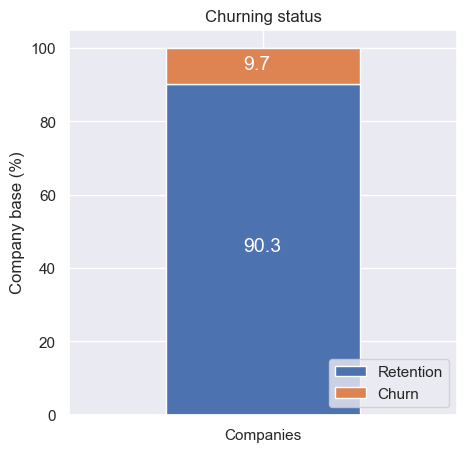

In [18]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

The second function `annotate_bars` is used by the first function, but the third function `plot_distribution` helps you to plot the distribution of a numeric column. An example of how it can be used is given below:

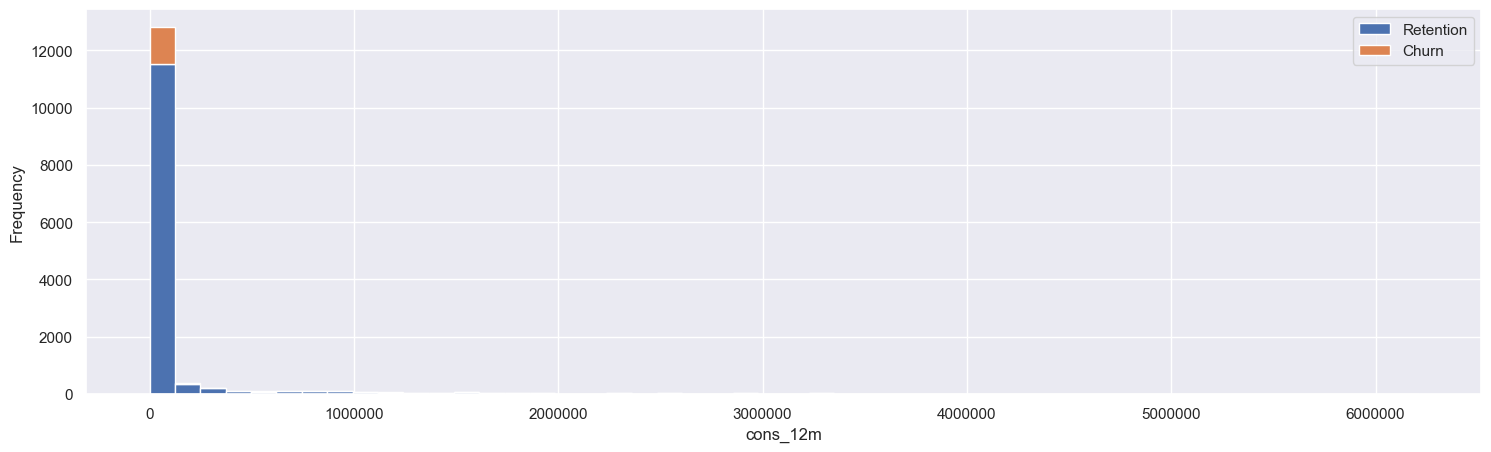

In [20]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=1, figsize=(18, 5))

plot_distribution(consumption, 'cons_12m', axs)

In [35]:
for i in client_df.columns:
    print(i)
    print(client_df[i].unique())
    print('*************************************************************')

id
['24011ae4ebbe3035111d65fa7c15bc57' 'd29c2c54acc38ff3c0614d0a653813dd'
 '764c75f661154dac3a6c254cd082ea7d' ... '10e6828ddd62cbcf687cb74928c4c2d2'
 '1cf20fd6206d7678d5bcafd28c53b4db' '563dde550fd624d7352f3de77c0cdfcd']
*************************************************************
channel_sales
['foosdfpfkusacimwkcsosbicdxkicaua' 'MISSING'
 'lmkebamcaaclubfxadlmueccxoimlema' 'usilxuppasemubllopkaafesmlibmsdf'
 'ewpakwlliwisiwduibdlfmalxowmwpci' 'epumfxlbckeskwekxbiuasklxalciiuu'
 'sddiedcslfslkckwlfkdpoeeailfpeds' 'fixdbufsefwooaasfcxdxadsiekoceaa']
*************************************************************
cons_12m
[    0  4660   544 ... 87146 32270  7223]
*************************************************************
cons_gas_12m
[  54946       0 1542867 ...    2126    3036   47940]
*************************************************************
cons_last_month
[     0    526   1998 ... 154171   3269  11367]
*************************************************************
date_activ
['

In [37]:
for i in price_df.columns:
    print(i)
    print(price_df[i].unique())
    print('*************************************************************')

id
['038af19179925da21a25619c5a24b745' '31f2ce549924679a3cbb2d128ae9ea43'
 '36b6352b4656216bfdb96f01e9a94b4e' ... 'd00da2c0c568614b9937791f681cd7d7'
 '045f94f0b7f538a8d8fae11080abb5da' '16f51cdc2baa19af0b940ee1b3dd17d5']
*************************************************************
price_date
['2015-01-01' '2015-02-01' '2015-03-01' '2015-04-01' '2015-05-01'
 '2015-06-01' '2015-07-01' '2015-08-01' '2015-09-01' '2015-10-01'
 '2015-11-01' '2015-12-01']
*************************************************************
price_off_peak_var
[0.151367 0.149626 0.150321 ... 0.240324 0.242632 0.100986]
*************************************************************
price_peak_var
[0.       0.103395 0.102234 ... 0.097724 0.094609 0.090899]
*************************************************************
price_mid_peak_var
[0.         0.071536   0.070375   0.07515    0.075096   0.068646
 0.069409   0.09872    0.101037   0.069578   0.069848   0.069794
 0.07327    0.070948   0.073989   0.073935   0.091448   0

In [41]:
client_df.describe().T

count           mean            std  min  \
cons_12m                        14606.0  159220.286252  573465.264198  0.0   
cons_gas_12m                    14606.0   28092.375325  162973.059057  0.0   
cons_last_month                 14606.0   16090.269752   64364.196422  0.0   
forecast_cons_12m               14606.0    1868.614880    2387.571531  0.0   
forecast_cons_year              14606.0    1399.762906    3247.786255  0.0   
forecast_discount_energy        14606.0       0.966726       5.108289  0.0   
forecast_meter_rent_12m         14606.0      63.086871      66.165783  0.0   
forecast_price_energy_off_peak  14606.0       0.137283       0.024623  0.0   
forecast_price_energy_peak      14606.0       0.050491       0.049037  0.0   
forecast_price_pow_off_peak     14606.0      43.130056       4.485988  0.0   
imp_cons                        14606.0     152.786896     341.369366  0.0   
margin_gross_pow_ele            14606.0      24.565121      20.231172  0.0   
margin_net_pow_ele              14606.0      24.562517      20.230280  0.0   
nb_prod_act                     14606.0       1.292346       0.709774  1.0   
net_margin                      14606.0     189.264522     311.798130  0.0   
num_years_antig                 14606.0       4.997809       1.611749  1.0   
pow_max                         14606.0      18.135136      13.534743  3.3   
churn                           14606.0       0.097152       0.296175  0.0   

                                        25%           50%           75%  \
cons_12m                        5674.750000  14115.500000  40763.750000   
cons_gas_12m                       0.000000      0.000000      0.000000   
cons_last_month                    0.000000    792.500000   3383.000000   
forecast_cons_12m                494.995000   1112.875000   2401.790000   
forecast_cons_year                 0.000000    314.000000   1745.750000   
forecast_discount_energy           0.000000      0.000000      0.000000   
forecast_meter_rent_12m           16.180000     18.795000    131.030000   
forecast_price_energy_off_peak     0.116340      0.143166      0.146348   
forecast_price_energy_peak         0.000000      0.084138      0.098837   
forecast_price_pow_off_peak       40.606701     44.311378     44.311378   
imp_cons                           0.000000     37.395000    193.980000   
margin_gross_pow_ele              14.280000     21.640000     29.880000   
margin_net_pow_ele                14.280000     21.640000     29.880000   
nb_prod_act                        1.000000      1.000000      1.000000   
net_margin                        50.712500    112.530000    243.097500   
num_years_antig                    4.000000      5.000000      6.000000   
pow_max                           12.500000     13.856000     19.172500   
churn                              0.000000      0.000000      0.000000   

                                         max  
cons_12m                        6.207104e+06  
cons_gas_12m                    4.154590e+06  
cons_last_month                 7.712030e+05  
forecast_cons_12m               8.290283e+04  
forecast_cons_year              1.753750e+05  
forecast_discount_energy        3.000000e+01  
forecast_meter_rent_12m         5.993100e+02  
forecast_price_energy_off_peak  2.739630e-01  
forecast_price_energy_peak      1.959750e-01  
forecast_price_pow_off_peak     5.926638e+01  
imp_cons                        1.504279e+04  
margin_gross_pow_ele            3.746400e+02  
margin_net_pow_ele              3.746400e+02  
nb_prod_act                     3.200000e+01  
net_margin                      2.457065e+04  
num_years_antig                 1.300000e+01  
pow_max                         3.200000e+02  
churn                           1.000000e+00

In [43]:
price_df.describe().T

count       mean        std  min        25%        50%  \
price_off_peak_var  193002.0   0.141027   0.025032  0.0   0.125976   0.146033   
price_peak_var      193002.0   0.054630   0.049924  0.0   0.000000   0.085483   
price_mid_peak_var  193002.0   0.030496   0.036298  0.0   0.000000   0.000000   
price_off_peak_fix  193002.0  43.334477   5.410297  0.0  40.728885  44.266930   
price_peak_fix      193002.0  10.622875  12.841895  0.0   0.000000   0.000000   
price_mid_peak_fix  193002.0   6.409984   7.773592  0.0   0.000000   0.000000   

                          75%        max  
price_off_peak_var   0.151635   0.280700  
price_peak_var       0.101673   0.229788  
price_mid_peak_var   0.072558   0.114102  
price_off_peak_fix  44.444710  59.444710  
price_peak_fix      24.339581  36.490692  
price_mid_peak_fix  16.226389  17.458221

In [7]:
import numpy as np

In [9]:
merged_data = pd.merge(client_df, price_df, on='id', how='inner')

In [11]:
num=merged_data.select_dtypes(include=np.number).columns.to_list()

In [67]:
merged_data[num].cov()

cons_12m  cons_gas_12m  cons_last_month  \
cons_12m                        3.289497e+11  4.562867e+10     3.574892e+10   
cons_gas_12m                    4.562867e+10  2.654945e+10     5.316974e+09   
cons_last_month                 3.574892e+10  5.316974e+09     4.144365e+09   
forecast_cons_12m               2.657661e+08  3.288073e+07     2.734201e+07   
forecast_cons_year              3.113916e+08  4.287739e+07     4.048785e+07   
forecast_discount_energy       -1.268539e+05 -1.047318e+04    -1.344658e+04   
forecast_meter_rent_12m         2.476310e+06  4.452649e+05     2.448047e+05   
forecast_price_energy_off_peak -1.086946e+02 -7.041814e+01    -8.163612e+00   
forecast_price_energy_peak      4.104059e+03  5.906056e+02     4.319082e+02   
forecast_price_pow_off_peak    -6.828114e+04 -1.497429e+04    -6.640527e+03   
imp_cons                        3.128356e+07  4.335159e+06     4.111800e+06   
margin_gross_pow_ele           -1.393746e+05  2.222701e+04    -1.506946e+04   
margin_net_pow_ele             -1.391278e+05  2.217148e+04    -1.504196e+04   
nb_prod_act                     6.279502e+04  2.767484e+04     7.727618e+03   
net_margin                      2.391200e+07  3.606825e+06     2.447259e+06   
num_years_antig                -3.351456e+03 -3.648177e+03    -3.874263e+02   
pow_max                         6.436441e+05  1.198207e+05     6.495662e+04   
churn                          -7.797057e+03 -1.828191e+03    -8.622086e+02   
price_off_peak_var              9.683522e+00 -4.797049e+01     3.578820e+00   
price_peak_var                  4.089966e+03  5.984608e+02     4.321025e+02   
price_mid_peak_var              1.037594e+03  2.603775e+02     1.068439e+02   
price_off_peak_fix             -3.577870e+04 -1.147145e+04    -3.557015e+03   
price_peak_fix                  3.575903e+05  8.381577e+04     3.691151e+04   
price_mid_peak_fix              2.453560e+05  5.934105e+04     2.508595e+04   

                                forecast_cons_12m  forecast_cons_year  \
cons_12m                             2.657661e+08        3.113916e+08   
cons_gas_12m                         3.288073e+07        4.287739e+07   
cons_last_month                      2.734201e+07        4.048785e+07   
forecast_cons_12m                    5.700444e+06        5.023876e+06   
forecast_cons_year                   5.023876e+06        1.055166e+07   
forecast_discount_energy             7.140257e+02        1.419152e+02   
forecast_meter_rent_12m              4.827022e+04        5.931857e+04   
forecast_price_energy_off_peak      -7.969356e+00       -1.263557e+01   
forecast_price_energy_peak           2.974892e+01        3.998267e+01   
forecast_price_pow_off_peak         -1.966352e+02       -6.430055e+02   
imp_cons                             5.173599e+05        1.075121e+06   
margin_gross_pow_ele                -1.116993e+03       -7.033682e+02   
margin_net_pow_ele                  -1.117485e+03       -7.011918e+02   
nb_prod_act                          9.470010e+01        9.314833e+01   
net_margin                           5.721811e+05        4.709346e+05   
num_years_antig                      8.263563e+01        2.528878e+02   
pow_max                              1.273274e+04        1.361349e+04   
churn                                9.106034e+00       -2.443007e+00   
price_off_peak_var                  -6.808846e+00       -1.114126e+01   
price_peak_var                       2.990758e+01        4.053387e+01   
price_mid_peak_var                   2.087359e+01        2.718591e+01   
price_off_peak_fix                   1.420429e+02       -3.771961e+02   
price_peak_fix                       7.427360e+03        9.858597e+03   
price_mid_peak_fix                   4.371801e+03        5.663990e+03   

                                forecast_discount_energy  \
cons_12m                                  -126853.868163   
cons_gas_12m                               -10473.181136   
cons_last_month                            -13446.5827

In [65]:
merged_data[num].corr()

cons_12m  cons_gas_12m  cons_last_month  \
cons_12m                        1.000000      0.488253         0.968209   
cons_gas_12m                    0.488253      1.000000         0.506883   
cons_last_month                 0.968209      0.506883         1.000000   
forecast_cons_12m               0.194080      0.084520         0.177888   
forecast_cons_year              0.167141      0.081010         0.193613   
forecast_discount_energy       -0.043291     -0.012581        -0.040883   
forecast_meter_rent_12m         0.065275      0.041314         0.057491   
forecast_price_energy_off_peak -0.007696     -0.017550        -0.005150   
forecast_price_energy_peak      0.145928      0.073919         0.136821   
forecast_price_pow_off_peak    -0.026534     -0.020483        -0.022990   
imp_cons                        0.159755      0.077925         0.187070   
margin_gross_pow_ele           -0.012010      0.006742        -0.011568   
margin_net_pow_ele             -0.011989      0.006725        -0.011548   
nb_prod_act                     0.154254      0.239295         0.169119   
net_margin                      0.133693      0.070983         0.121902   
num_years_antig                -0.003625     -0.013891        -0.003734   
pow_max                         0.082908      0.054328         0.074544   
churn                          -0.045918     -0.037897        -0.045237   
price_off_peak_var              0.000723     -0.012614         0.002382   
price_peak_var                  0.141811      0.073040         0.133479   
price_mid_peak_var              0.050162      0.044308         0.046018   
price_off_peak_fix             -0.013501     -0.015237        -0.011958   
price_peak_fix                  0.051386      0.042396         0.047256   
price_mid_peak_fix              0.054689      0.046558         0.049816   

                                forecast_cons_12m  forecast_cons_year  \
cons_12m                                 0.194080            0.167141   
cons_gas_12m                             0.084520            0.081010   
cons_last_month                          0.177888            0.193613   
forecast_cons_12m                        1.000000            0.647775   
forecast_cons_year                       0.647775            1.000000   
forecast_discount_energy                 0.058536            0.008551   
forecast_meter_rent_12m                  0.305657            0.276083   
forecast_price_energy_off_peak          -0.135549           -0.157965   
forecast_price_energy_peak               0.254101            0.251016   
forecast_price_pow_off_peak             -0.018356           -0.044118   
imp_cons                                 0.634659            0.969391   
margin_gross_pow_ele                    -0.023121           -0.010701   
margin_net_pow_ele                      -0.023132           -0.010669   
nb_prod_act                              0.055882            0.040401   
net_margin                               0.768490            0.464900   
num_years_antig                          0.021473            0.048301   
pow_max                                  0.393988            0.309617   
churn                                    0.012882           -0.002540   
price_off_peak_var                      -0.122187           -0.146954   
price_peak_var                           0.249104            0.248149   
price_mid_peak_var                       0.242411            0.232056   
price_off_peak_fix                       0.012876           -0.025131   
price_peak_fix                           0.256392            0.250138   
price_mid_peak_fix                       0.234085            0.222910   

                                forecast_discount_energy  \
cons_12m                                       -0.043291   
cons_gas_12m                                   -0.012581   
cons_last_month                                -0.040883   
forecast_cons_12m                               0.058536   
forecast_cons_year            

In [73]:
import matplotlib.pyplot as plt

In [87]:
plt.rcParams['figure.figsize'] = [16,8]

<Axes: >

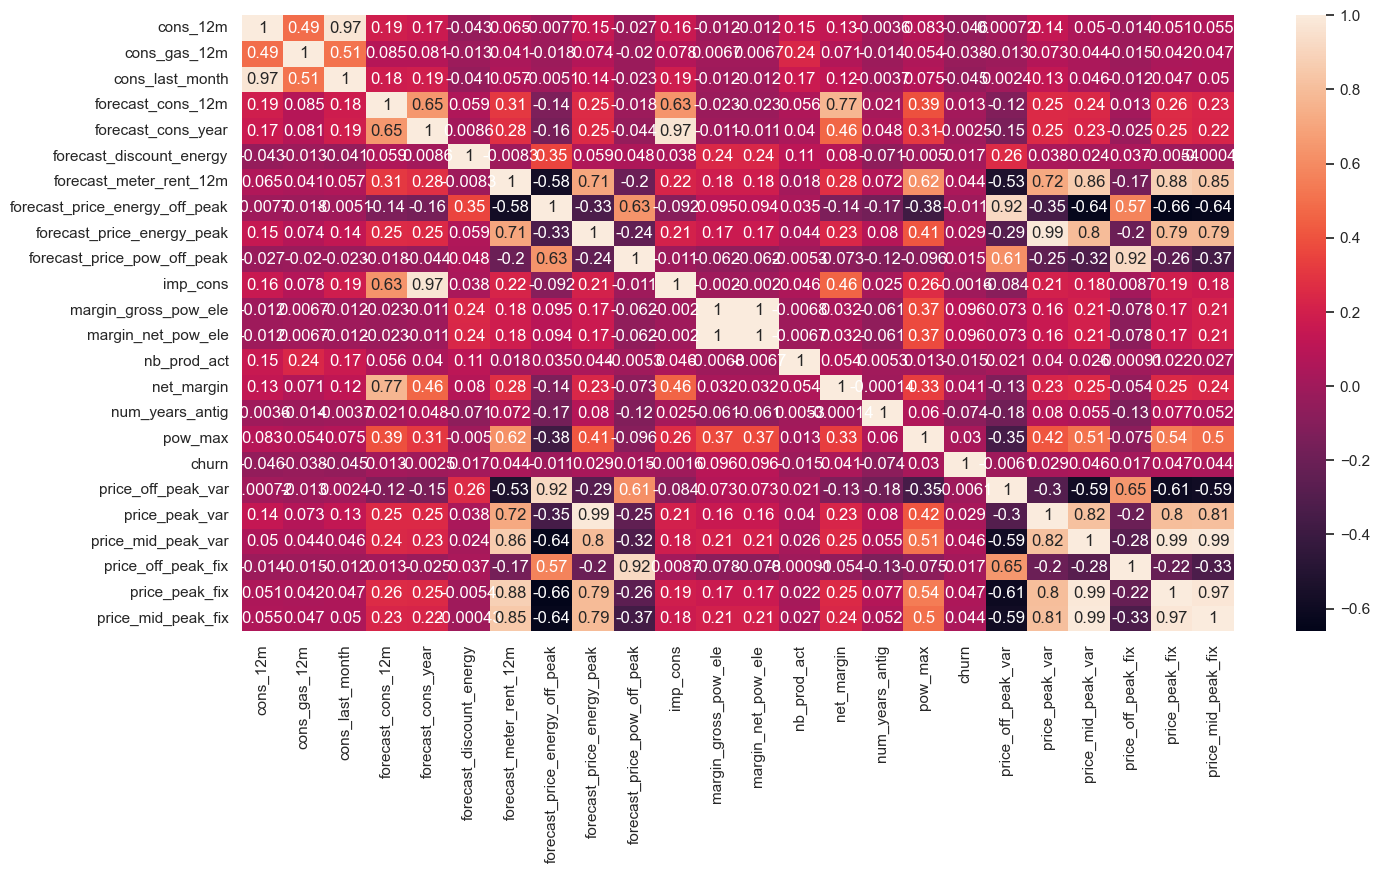

In [89]:
sns.heatmap(merged_data[num].corr(),annot=True)

Text(0.5, 1.0, 'Heatmap of High Correlations')

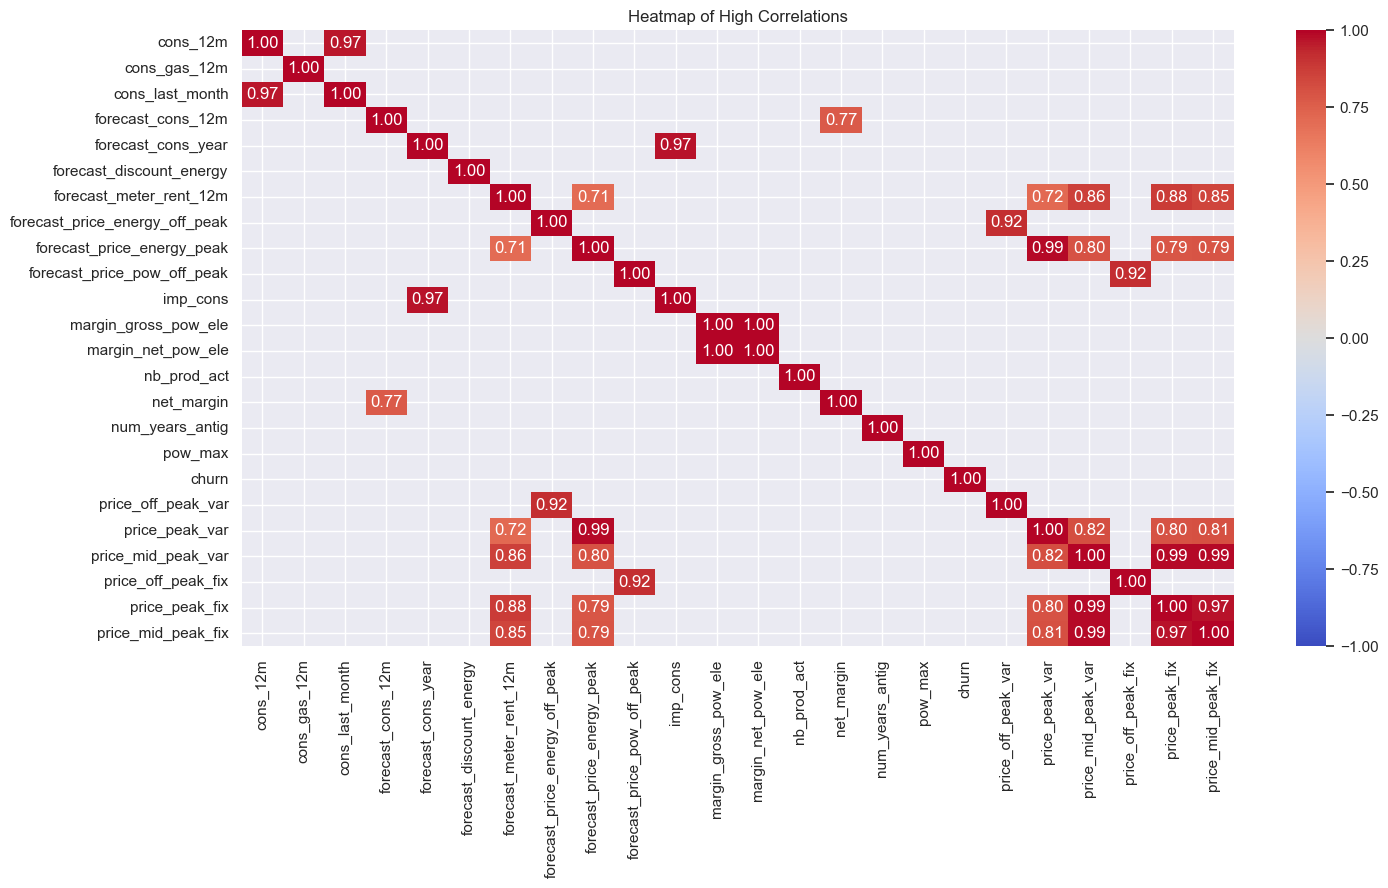

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

correlation_matrix = merged_data[num].corr()

threshold = 0.7
high_corr_matrix = correlation_matrix[(correlation_matrix >= threshold) | (correlation_matrix <= -threshold)]

sns.heatmap(high_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Heatmap of High Correlations")

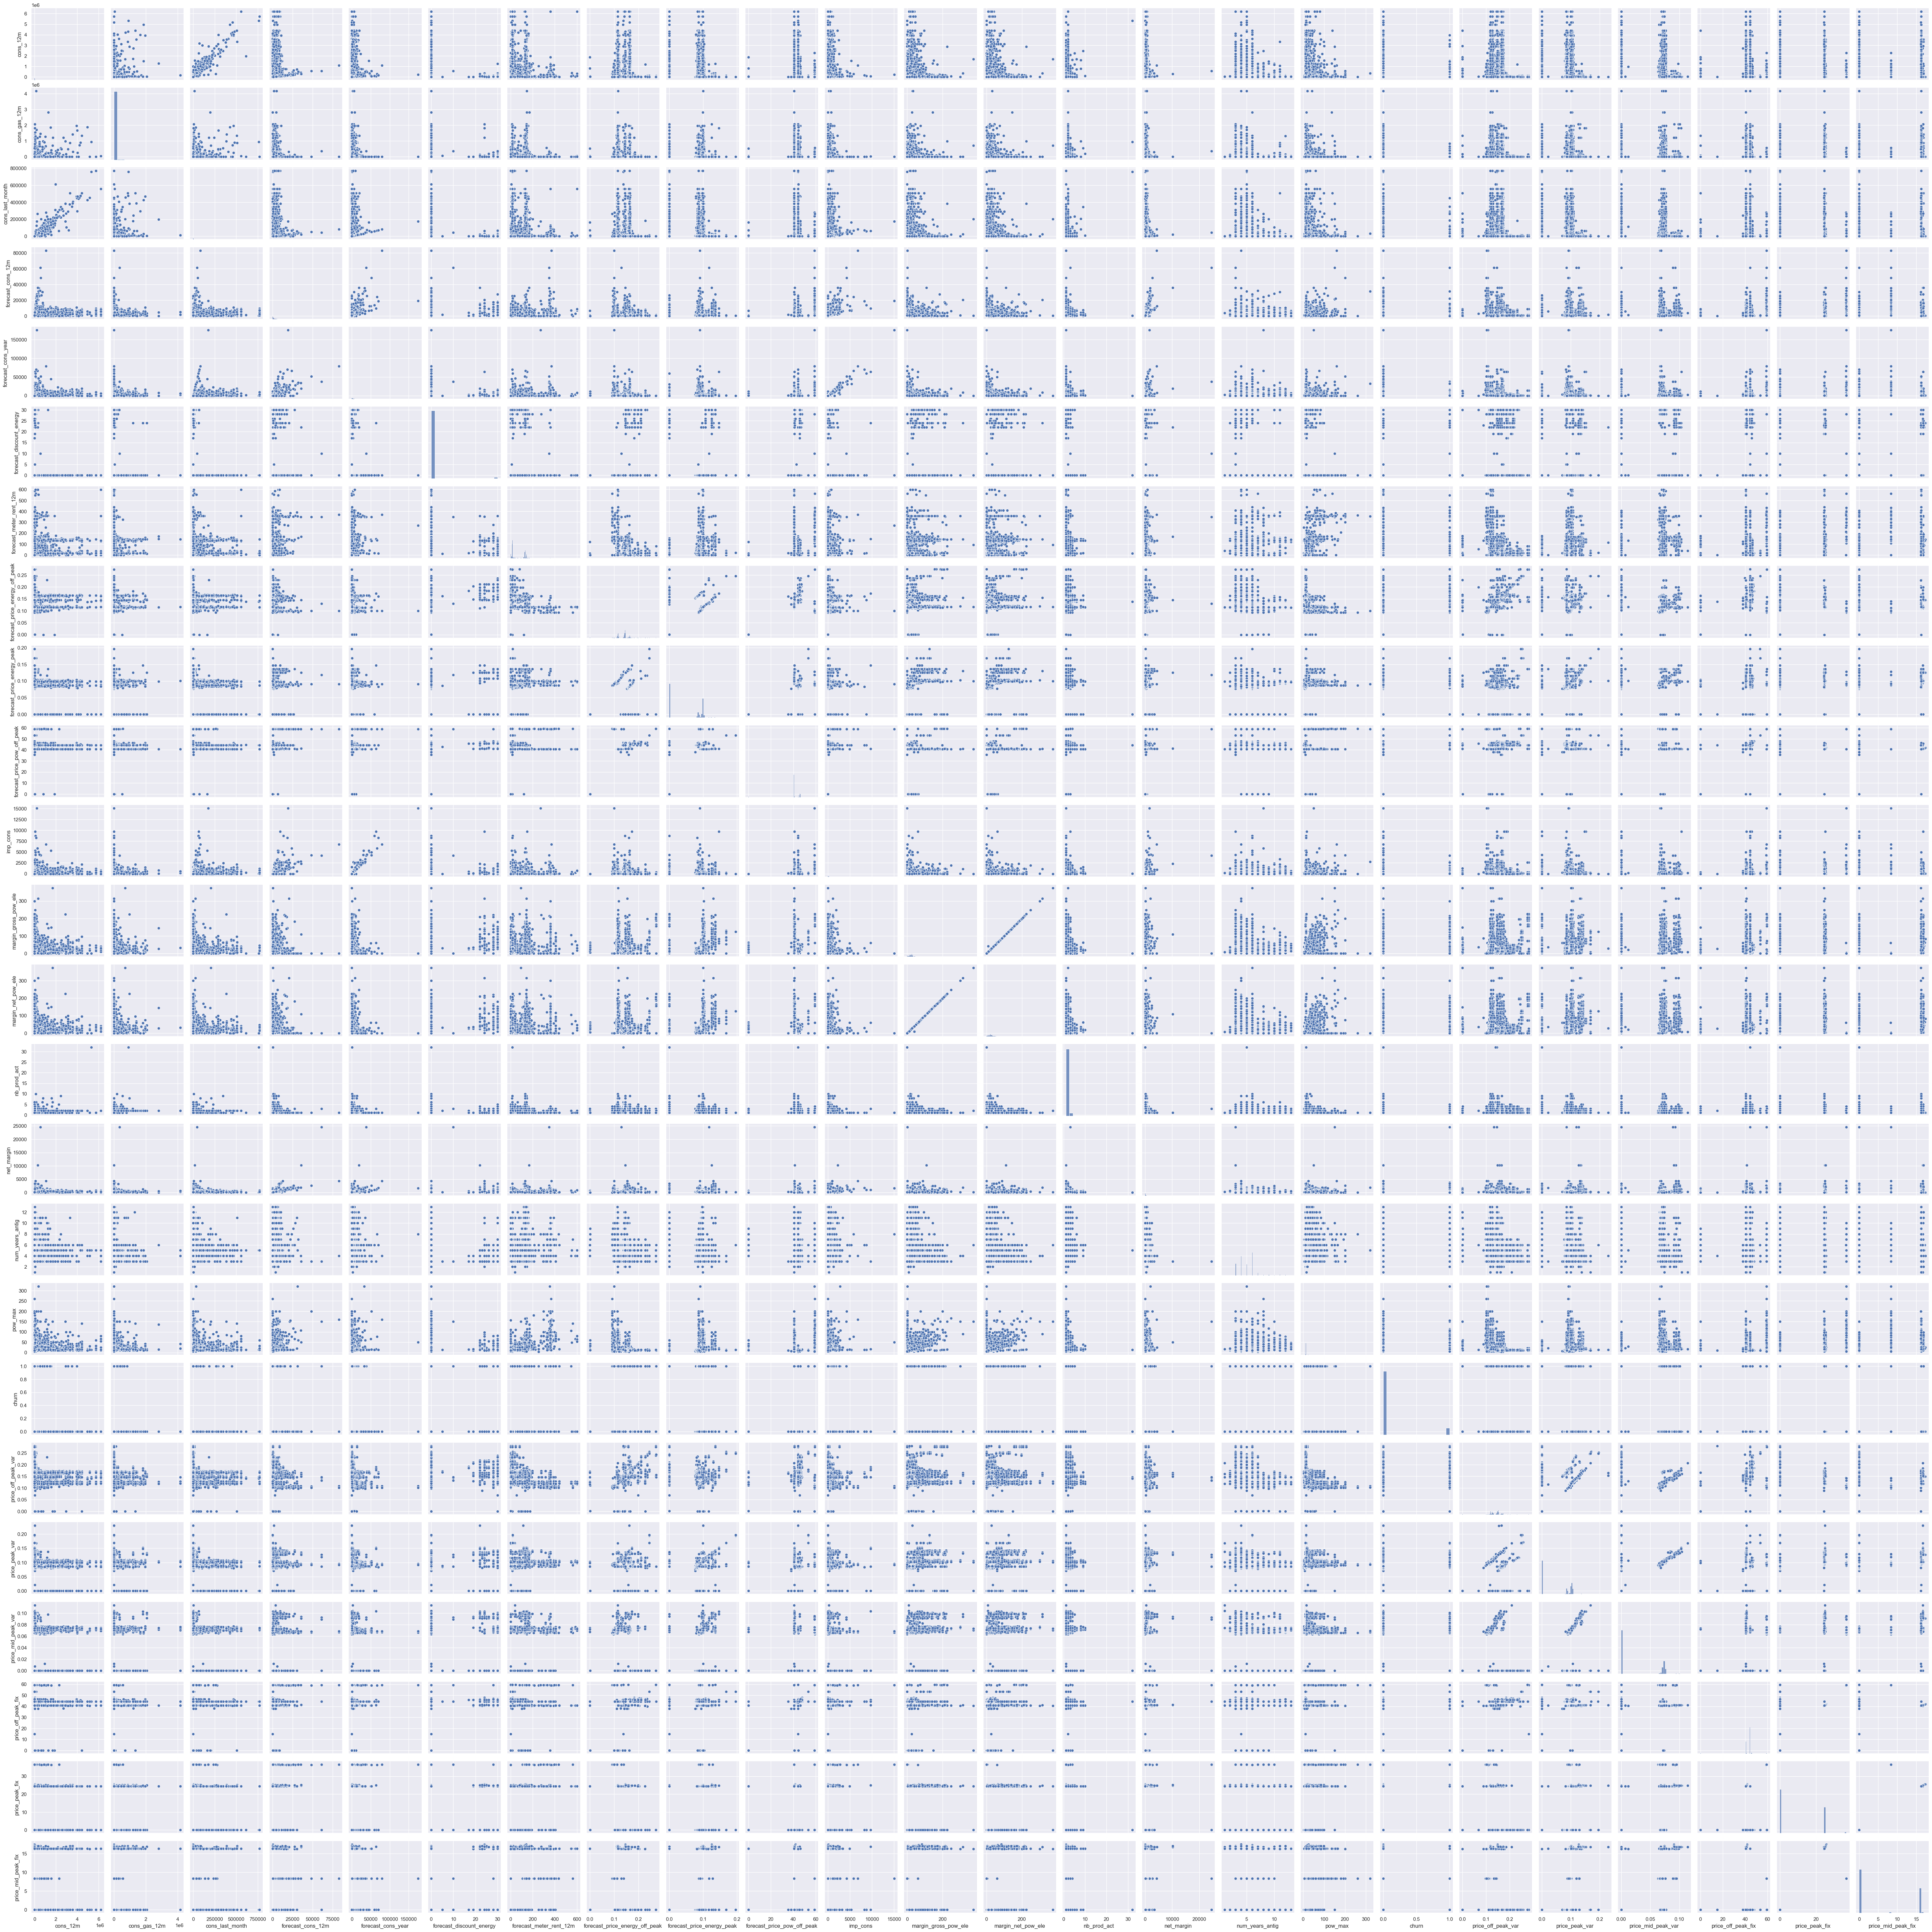

In [105]:
sns.pairplot(merged_data[num])

In [107]:
len(num)

24

In [117]:
import warnings

warnings.filterwarnings('ignore')

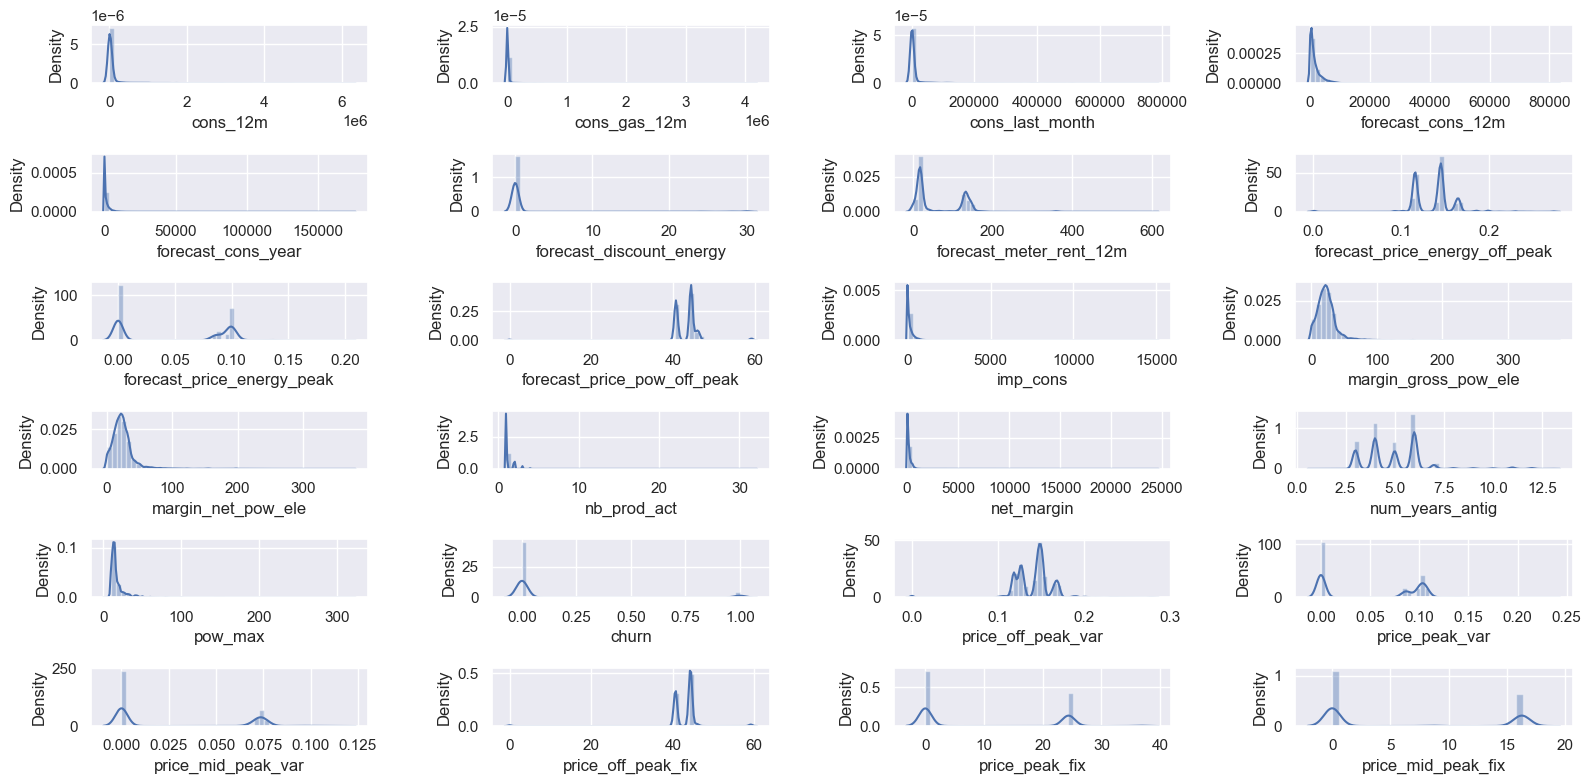

In [119]:
t=1
for i in num:
    plt.subplot(6,4,t)
    sns.distplot(merged_data[i])
    t+=1
plt.tight_layout()
plt.show()

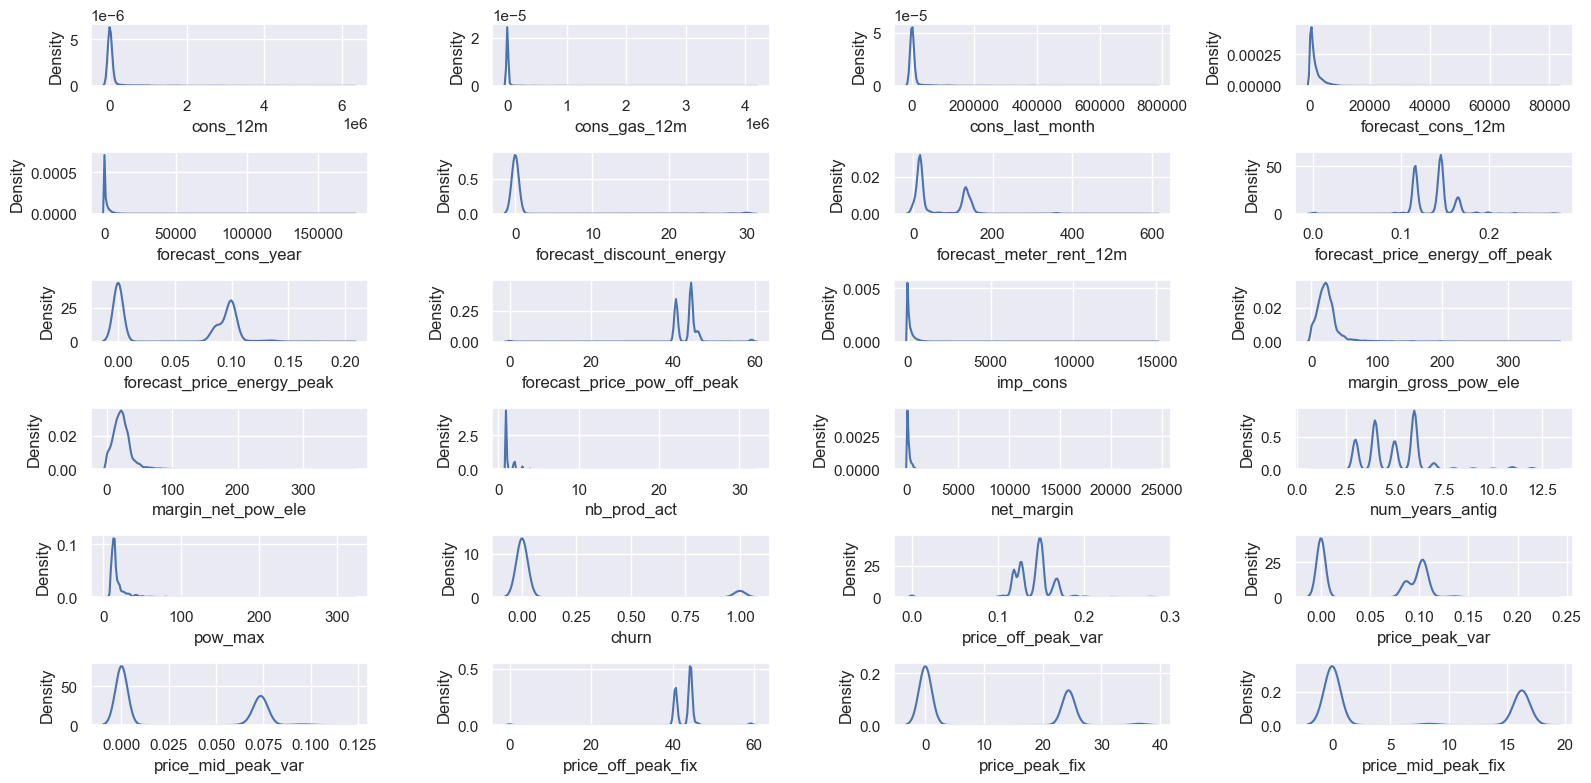

In [111]:
t=1
for i in num:
    plt.subplot(6,4,t)
    sns.kdeplot(merged_data[i])
    t+=1
plt.tight_layout()
plt.show()

In [13]:
merged_data.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn',
       'price_date', 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix'],
      dtype='object')

In [17]:
# Assuming merged_data is already loaded and processed
data = merged_data

# Feature 1: Service duration
data['service_duration'] = (pd.to_datetime(data['date_end']) - pd.to_datetime(data['date_activ'])).dt.days

# Feature 2: Days until renewal
data['days_until_renewal'] = (pd.to_datetime(data['date_renewal']) - pd.to_datetime('today')).dt.days

# Feature 3: Average price variability
data['avg_price_variability'] = data[['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var']].mean(axis=1)

# Feature 4: Forecast vs actual consumption difference
data['consumption_diff'] = data['forecast_cons_12m'] - data['cons_12m']

# Feature 5: Flag for high implied consumption
data['high_imp_cons_flag'] = (data['imp_cons'] > data['forecast_cons_12m']).astype(int)

# Preview the new data
data.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
2  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
3  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
4  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   

   cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
0         0         54946                0  2013-06-15  2016-06-15   
1         0         54946                0  2013-06-15  2016-06-15   
2         0         54946                0  2013-06-15  2016-06-15   
3         0         54946                0  2013-06-15  2016-06-15   
4         0         54946                0  2013-06-15  2016-06-15   

  date_modif_prod date_renewal  forecast_cons_12m  ...  price_peak_var  \
0      2015-11-01   2015-06-23                0.0  ...        0.103395   
1      2015-11-01   2015-06-23                0.0  ...        0.103395   
2      2015-11-01   2015-06-23                0.0  ...        0.103395   
3      2015-11-01   2015-06-23                0.0  ...        0.103395   
4      2015-11-01   2015-06-23                0.0  ...        0.103395   

   price_mid_peak_var  price_off_peak_fix  price_peak_fix  price_mid_peak_fix  \
0            0.071536           40.565969       24.339581           16.226389   
1            0.071536           40.565969       24.339581           16.226389   
2            0.071536           40.565973       24.339578           16.226383   
3            0.071536           40.565973       24.339578           16.226383   
4            0.071536           40.565973       24.339578           16.226383   

   service_duration days_until_renewal  avg_price_variability  \
0              1096              -3574               0.100302   
1              1096              -3574               0.100302   
2              1096              -3574               0.100302   
3              1096              -3574               0.100302   
4              1096              -3574               0.100302   

   consumption_diff  high_imp_cons_flag  
0               0.0                   0  
1               0.0                   0  
2               0.0                   0  
3               0.0                   0  
4               0.0                   0  

[5 rows x 38 columns]